# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who:
   - have a **low total_claim_amount** (e.g., below $1,000),
   - have a response "Yes" to the last marketing campaign.

2. Using the original Dataframe, analyze:
   - the average `monthly_premium` and/or customer lifetime value by `policy_type` and `gender` for customers who responded "Yes", and
   - compare these insights to `total_claim_amount` patterns, and discuss which segments appear most profitable or low-risk for the company.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [7]:
import pandas as pd
import numpy as np

In [8]:
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv'
df = pd.read_csv(url)

In [9]:
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [13]:
df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [10]:
#1. Create a new DataFrame that only includes customers who:
#  - have a **low total_claim_amount** (e.g., below $1,000),
#   - have a response "Yes" to the last marketing campaign.

filtered = df[
    (df['Total Claim Amount'] < 1000) & (df['Response'] == 'Yes')
]
filtered



,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
8,8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,...,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN
15,15,CW49887,California,4626.801093,Yes,Basic,Master,1/16/11,Employed,F,...,0.0,1,Special Auto,Special L1,Offer2,Branch,547.200000,SUV,Medsize,NaN
19,19,NJ54277,California,3746.751625,Yes,Extended,College,2/26/11,Employed,F,...,1.0,1,Personal Auto,Personal L2,Offer2,Call Center,19.575683,Two-Door Car,Large,A
27,27,MQ68407,Oregon,4376.363592,Yes,Premium,Bachelor,2/28/11,Employed,F,...,0.0,1,Personal Auto,Personal L3,Offer2,Agent,60.036683,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10844,10844,FM31768,Arizona,5979.724161,Yes,Extended,High School or Below,2/7/11,Employed,F,...,0.0,3,Personal Auto,Personal L1,Offer2,Agent,547.200000,Four-Door Car,Medsize,NaN
10852,10852,KZ80424,Washington,8382.478392,Yes,Basic,Bachelor,1/27/11,Employed,M,...,0.0,2,Personal Auto,Personal L2,Offer2,Call Center,791.878042,NaN,NaN,A
10872,10872,XT67997,California,5979.724161,Yes,Extended,High School or Below,2/7/11,Employed,F,...,0.0,3,Personal Auto,Personal L3,Offer2,Agent,547.200000,Four-Door Car,Medsize,NaN
10887,10887,BY78730,Oregon,8879.790017,Yes,Basic,High School or Below,2/3/11,Employed,F,...,0.0,7,Special Auto,Special L2,Offer1,Agent,528.200860,SUV,Small,A


In [12]:
#2. Using the original Dataframe, analyze:
#   - the average `monthly_premium` and/or customer lifetime value by `policy_type` and `gender` for customers who responded "Yes", and
#   - compare these insights to `total_claim_amount` patterns, and discuss which segments appear most profitable or low-risk for the company.

df_yes = df[df['Response'] == 'Yes']

In [14]:
premium_stats = (df_yes.groupby(['Policy Type', 'Gender']).agg(
    avg_montly_premium=('Monthly Premium Auto', 'mean'),
    avg_customer_lifetime_Value=('Customer Lifetime Value', 'mean')
))

premium_stats

avg_montly_premium  avg_customer_lifetime_Value
Policy Type    Gender                                                 
Corporate Auto F                94.301775                  7712.628736
               M                92.188312                  7944.465414
Personal Auto  F                98.998148                  8339.791842
               M                91.085821                  7448.383281
Special Auto   F                92.314286                  7691.584111
               M                86.343750                  8247.088702

In [15]:
# Podemos ver que las mujers pagan en todas mas polizas mas que los hombre, pero aunque los hombres paguen menos aportan 
#mas valor total 

In [19]:
#3.Analyze the total number of customers who have policies in each state, and then filter the results to only 
# include states where there are more than 500 customers.

customer_by_state = df['State'].value_counts()
large_states = customer_by_state[customer_by_state > 500]
large_states


State
California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: count, dtype: int64

In [20]:
# La mayor cantidad de polisas por estados, es california 

In [22]:
#4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.
clv_stats = df.groupby(['Education', 'Gender'])['Customer Lifetime Value'].agg(['max', 'min', 'median'])
clv_stats


max          min       median
Education            Gender                                       
Bachelor             F       73225.95652  1904.000852  5640.505303
                     M       67907.27050  1898.007675  5548.031892
College              F       61850.18803  1898.683686  5623.611187
                     M       61134.68307  1918.119700  6005.847375
Doctor               F       44856.11397  2395.570000  5332.462694
                     M       32677.34284  2267.604038  5577.669457
High School or Below F       55277.44589  2144.921535  6039.553187
                     M       83325.38119  1940.981221  6286.731006
Master               F       51016.06704  2417.777032  5729.855012
                     M       50568.25912  2272.307310  5579.099207

In [23]:
#hombres con High School or Below tiene clv altos
#mujeres con Bachelor el maximo de clv alto y consistente


In [27]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'], format='%m/%d/%Y')

df['Month'] = df['Effective To Date'].dt.month_name()

In [28]:
#5. The marketing team wants to analyze the number of policies sold by state and month.
# Present the data in a table where the months are arranged as columns and the states are arranged as rows.
#PIVOT:
policies_table = df.pivot_table(
    index= 'State', 
    columns= 'Month',
    values='Policy',
    aggfunc='count',
    fill_value=0
)

policies_table

Month,February,January
State,,
Arizona,929,1008
California,1634,1918
Nevada,442,551
Oregon,1344,1565
Washington,425,463


In [30]:
#total policy
policy_by_state = df.groupby('State')['Policy Type'].count()

#Sort
policy_by_state = policy_by_state.sort_values(ascending=False)
top3_states = policy_by_state.head(3).index.tolist()

In [31]:
# Filtrar solo top 3 estados
df_top3 = df[df['State'].isin(top3_states)]

# Pivot table: estados x meses
policies_top3_table = df_top3.pivot_table(
    index='State',
    columns='Month',
    values='Policy',
    aggfunc='count',
    fill_value=0
)

# Ordenar columnas de meses cronológicamente
months_order = ['January','February','March','April','May','June',
                'July','August','September','October','November','December']
policies_top3_table = policies_top3_table.reindex(columns=months_order)

policies_top3_table

Month,January,February,March,April,May,June,July,August,September,October,November,December
State,,,,,,,,,,,,
Arizona,1008,929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,1918,1634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oregon,1565,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.
#Hint: You can use melt to unpivot the data and create a table that shows the customer response rate 
# (those who responded "Yes") by marketing channel.

 # Agrupar por canal y calcular tasa de respuesta
response_rate = df.groupby('Sales Channel')['Response'].value_counts(normalize=True).unstack().fillna(0)

# Solo quedarnos con la proporción de "Yes"
response_rate = response_rate['Yes'] * 100  # en porcentaje

response_rate = response_rate.sort_values(ascending=False)

response_rate

Sales Channel
Agent          19.074550
Web            11.714097
Branch         11.378709
Call Center    10.978639
Name: Yes, dtype: float64

/var/folders/m_/06pskt392pn6qvkq92krm8xm0000gn/T/ipykernel_83485/536161576.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_rate.index, y=response_rate.values, palette='Blues')


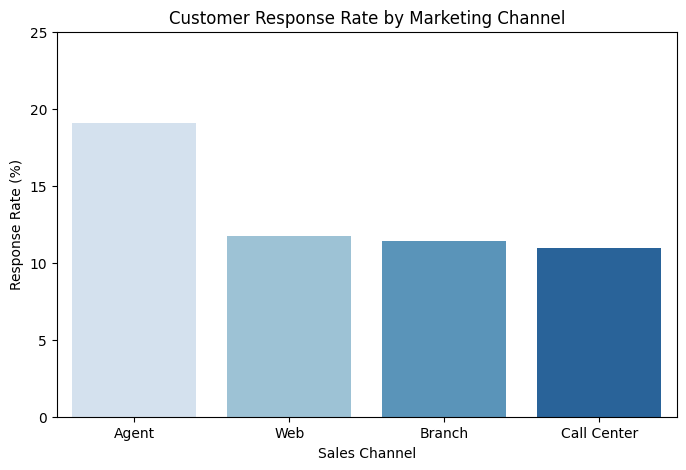

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=response_rate.index, y=response_rate.values, palette='Blues')
plt.ylabel('Response Rate (%)')
plt.title('Customer Response Rate by Marketing Channel')
plt.ylim(0, 25)
plt.show()


In [ ]:
#!pip install matplotlib seaborn --upgrade

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 41.1 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl (253 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 33.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
